In [149]:
import numpy as np
import math as mh
import matplotlib.pyplot as plt
from sympy import diff

Начальные данные

In [150]:
g0 = 3
ro0 = 11.346
p0 = 0
u0 = 10**(6)
c0 = 1.972*10**(5)
g3 = 3
ro3 = 7.85
p3 = 0
u3 = 0
c3 = 4.65*10**(5)

Построение многочлена:

In [151]:
h0 = (g0+1)/(g0-1)
print("h0 =", h0)

h3 = (g3+1)/(g3-1)
print("h3 =", h3)

alpha0 = ro0*c0**(2)*(h0-1)
print("alpha0 =", alpha0)

alpha3 = ro3*c3**(2)*(h3-1)
print("alpha3 =", alpha3)

V = u0-u3
print("V = ", V)

beta0 = (alpha0)/(ro0*V**(2))
print("beta0", beta0)

beta3 = (alpha3)/(ro0*V**(2))
print("beta3", beta3)

e = (ro3)/(ro0)
print("e = ", e)


h0 = 2.0
h3 = 2.0
alpha0 = 441221432640.0
alpha3 = 1697366250000.0005
V =  1000000
beta0 0.03888784
beta3 0.14960040983606562
e =  0.6918737881191609


Посчитаем коэффициенты уравнения: $\sum_{i=0}^6 a_iY^{6-i} = 0$

In [152]:
a0 = ((h0-1)*h3*e-(h3-1)*h0)**(2)
print("a0 = ",a0)

a1 = 2*((h0-1)**(2)*e**(2)*h3*beta3+(h3-1)**(2)*h0*beta0-(h0-1)*e**(2)*h0*h3**(2)-(h3-1)*e*h0**(2)*h3-(h0-1)*(h3-1)*e*(beta0*h3+h0*beta3))
print("a1 = ",a1)

a2 = e**(2)*h0**(2)*h3**(2)+(h0-1)**(2)*e**(2)*beta3**(2)+(h3-1)**(2)*beta0**(2)-2*(h0-1)*e**(2)*h3*(beta0*h3+2*h0*beta3)-2*(h3-1)*e*h0*(h0*beta3+2*h3*beta0)-2*(h0-1)*(h3-1)*e*beta0*beta3
print("a2 = ",a2)

a3 = 2*(e**(2)*h0*h3*(beta0*h3+h0*beta3)-(h0-1)*e**(2)*beta3*(beta3*h0+2*h3*beta0)-(h3-1)*e*beta0*(h3*beta0+2*h0*beta3))
print("a3 = ",a3)

a4 = e**(2)*(beta0**(2)*h3**(2)+h0**(2)*beta3**(2)+4*h0*h3*beta0*beta3)-2*(h0-1)*e**(2)*beta0*beta3**(2)-2*(h3-1)*e*beta3*beta0**(2)
print("a4 = ",a4)

a5 = 2*e**(2)*beta0*beta3*(h0*beta3+h3*beta0)
print("a5 = ",a5)

a6 = e**(2)*beta0**(2)*beta3**(2)
print("a6 = ",a6)

koeffs = [a0, a1, a2, a3, a4, a5, a6]

a0 =  0.37976704979214304
a1 =  -18.808650501601875
a2 =  5.109964796799071
a3 =  1.342119767306096
a4 =  0.08915960176173611
a5 =  0.0020996390084841434
a6 =  1.6201191820363643e-05


In [153]:
def f(x, koeffs):
    func = []
    koeffs = koeffs[::-1]
    for i in range(len(koeffs)):
        func.append(x**i * koeffs[i])
    return sum(func)

Локализация корней:

Найдем кольцо, в котором расположены корни:

$\frac{|а_{n}|}{|а_{n}|+B} \leqslant |Y| \leqslant 1+\frac{A}{|а_{0}|}$ (обозначения из лабораторного практикума)

8.613684359645356e-07 <= |Y| <= 50.52680995335527


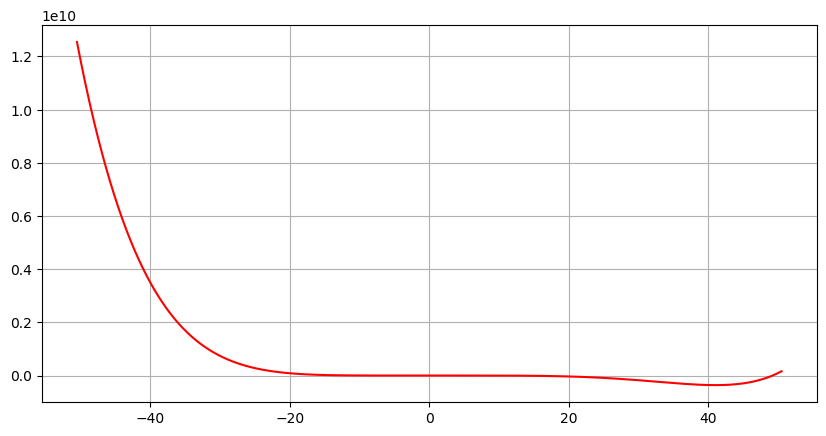

In [154]:
A = max([abs(a1), abs(a2), abs(a3), abs(a4), abs(a5), abs(a6)])
B = max([abs(a0), abs(a1), abs(a2), abs(a3), abs(a4), abs(a5)])
a = (abs(a6))/((abs(a6)+B))
b = (1 + (A/abs(a0)));   
print(a, "<= |Y| <=", b)

plt.figure(figsize=(10, 5), dpi=100)
grid = np.linspace((-1)*b, b, 200000)
plt.grid(True)
plt.plot(grid, f(grid,koeffs), color='red')

Рассмотрим поближе окрестность 0, а именно отрезок [-0.1,0.05]

[-0.1, 0.05, -0.005, 0.005]

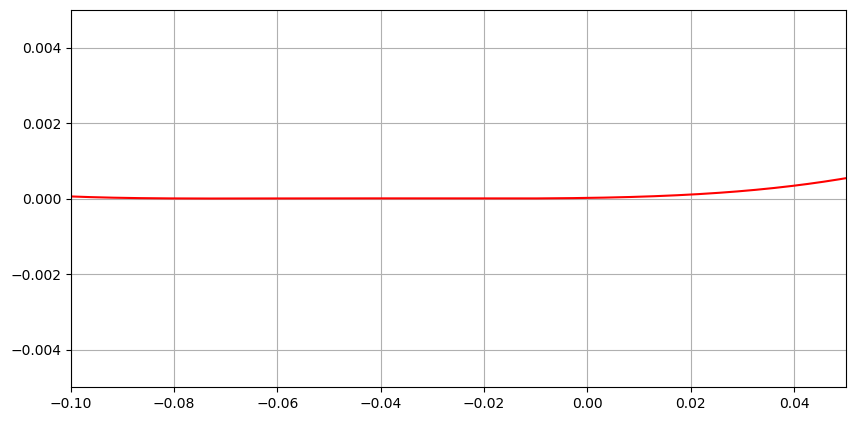

In [155]:
plt.figure(figsize=(10, 5), dpi=100)
grid = np.linspace((-1)*b, b, 200000)
plt.grid(True)
plt.plot(grid, f(grid,koeffs), color='red')
plt.axis([-0.1, 0.05, -0.005, 0.005])

Попробуем локализовать корни уравнения с помощью теоремы Декарта:
$f(Y) = a_{0}*Y^{6} + a_{1}*Y^{5} + a_{2}*Y^{4} + a_{3}*Y^{3} + a_{4}*Y^{2} + a_{5}*Y + a_{6} = 0$

In [156]:
#1. Положительные
cnt = 0
tmp = koeffs[0]
for i in koeffs:
    if(i*tmp < 0):
        cnt += 1
        tmp = i
root_cnt = [0]
tmp2 = cnt
while(tmp2 > 0):
    root_cnt.append(tmp2 - 2)
    tmp2 -= 2
print("Число положительных корней:", cnt, 'либо на четное число меньше:', root_cnt[:-1] )

#2. Отрицательные
cnt = 0
tmp = koeffs[0]
for i in range(len(koeffs)):
    if((-koeffs[i])*tmp < 0 and i%2 == 0):
        cnt += 1
        tmp = i
root_cnt = []
tmp2 = cnt
while(tmp2 > 0):
    root_cnt.append(tmp2 - 2)
    tmp2 -= 2
print("Число отрицательных корней:", cnt)

Число положительных корней: 2 либо на четное число меньше: [0]
Число отрицательных корней: 1


Локализуем корни по теореме Штурма:

In [166]:
#Теорема Штурма
def derivative(a, n):
    tmp_a = a.copy()
    k = n
    for i in range(n-1):
        tmp_a[i] = k*tmp_a[i]
        k -= 1
    tmp_a.pop()
    return tmp_a

def sturm(f):
    f0 = f
    f1 = derivative(f0, 6)
    f_seq = [f0, f1]
    for i in range(2, len(f)):
        new_f_coeffs = -1 * np.polydiv(f_seq[i-2], f_seq[i-1])[1]
        f_seq.append(new_f_coeffs)
    return f_seq

sturm_seq = sturm(koeffs)

#Количество перемен знаков на [a, b]
tmp_a, tmp_b = f(a, sturm_seq[0]), f(b, sturm_seq[0])
signuma, signumb = 0, 0
for i in range(len(sturm_seq)):
    if(tmp_a * f(a, sturm_seq[i]) < 0):
        tmp_a = f(a, sturm_seq[i])
        signuma += 1
    if(tmp_b * f(b, sturm_seq[i]) < 0):
        tmp_b = f(b, sturm_seq[i])
        signumb += 1
print('Количество корней между:', [a, b], signuma - signumb)

#Количество перемен знаков на [-a, -b]
tmp_a, tmp_b = f(a, sturm_seq[0]), f(b, sturm_seq[0])
signuma, signumb = 0, 0
for i in range(len(sturm_seq)):
    if(tmp_a * f(-a, sturm_seq[i]) < 0):
        tmp_a = f(-a, sturm_seq[i])
        signuma += 1
    if(tmp_b * f(-b, sturm_seq[i]) < 0):
        tmp_b = f(-b, sturm_seq[i])
        signumb += 1
print('Количество корней между:', [-b, -a], -signuma + signumb)

Количество корней между: [8.613684359645356e-07, 50.52680995335527] 2
Количество корней между: [-50.52680995335527, -8.613684359645356e-07] 2


##### Методы решения нелинейных уравнений:

##### Метод половинного деления:
Выбераем $x_0$ = a, $x_1 = b$, $x_2 = \frac{a+b}{2}$ , потом если $f(x_1)f(x_2) < 0$, то $x_3 = \frac{x_1 + x_2}{2}$ и так далее до нахождения корня
 
##### Метод простой итерации:
Пусть существует $x^*: f(x^*) = 0$ и $x^* = \phi(x^*)$, тогда можно создать последовательность $x_n = \phi(x_{n-1})$, которая сойдется к $x^*$

In [169]:
#Метод половинного деления:
#1. Положительный корень №1
x0 = 46
x1 = 52
x2 = (a + b)/2
x = [x0, x1, x2]
for i in range(1, 1000):
    if(f(x[i-1], koeffs)*f(x[i+1], koeffs) < 0):
        x[i] = x[i-1]
        x.append((x[i-1]+x[i+1])/2)
    if(f(x[i], koeffs)*f(x[i+1], koeffs) < 0):
        x.append((x[i]+x[i+1])/2)
print('Положительный корень №1:', x[-1])

#2. Положительный корень №2
x0 = 0.1
x1 = 0.5
x2 = (a + b)/2
x = [x0, x1, x2]
for i in range(1, 1000):
    if(f(x[i-1], koeffs)*f(x[i+1], koeffs) < 0):
        x[i] = x[i-1]
        x.append((x[i-1]+x[i+1])/2)
    if(f(x[i], koeffs)*f(x[i+1], koeffs) < 0):
        x.append((x[i]+x[i+1])/2)
print('Положительный корень №2:', x[-1])

#3. Отрицательный корень
x0 = -b
x1 = -a
x2 = (x0 + x1)/2
x = [x0, x1, x2]
for i in range(1, 1000):
    if(f(x[i-1], koeffs)*f(x[i+1], koeffs) < 0):
        x[i] = x[i-1]
        x.append((x[i-1]+x[i+1])/2)
    if(f(x[i], koeffs)*f(x[i+1], koeffs) < 0):
        x.append((x[i]+x[i+1])/2)
print('Отрицательный корень:', x[-1])

Положительный корень №1: 49.251927167114104
Положительный корень №2: 0.46860457139690215


IndexError: list index out of range

##### Мои догадки о корнях:
Предположу, что у меня всего один отрицательный корень, у которого кратность больше 1, поэтому результаты теоремы декарта и теоремы Штурма не сходятся. И метод половинного деления именно из-за этого "сходит с ума" и не может просчитать мне отрицательный корень. К тому же из графика видно, что пересечение с осью абсцисс происходит на некотором отрезке вблизи нуля.

In [159]:
#Точность метода половинного деления:
delta0 = abs(a - x[-1])
print('Точность метода половинного деления при 1000 итераций:', delta0/(2**(1000)))

Точность метода половинного деления при 1000 итераций: 2.357741795007213e-300


In [160]:
#Метод простой итерации(Ньютона):
def method_newton(x, a):
    phi = []
    for i in range(25):
        f_x = f(x, a)
        f_der = derivative(a, 6)
        f_der_x = f(x, f_der) 
        x = x - f_x/f_der_x
        phi.append(x)
    return phi
print('Отрицательный корень:', method_newton(0.01, koeffs)[-1])
print('Положительный корень №1:', method_newton(1, koeffs)[-1])
print('Положительный корень №2:', method_newton(46, koeffs)[-1])

Отрицательный корень: -0.019230431480448916
Положительный корень №1: 0.4562499820130741
Положительный корень №2: 49.252154442375506


In [161]:
#Точность метода простой итерации
f_der_1 = derivative(a_koeffs, 6)
f_der_1_a = f(a, f_der_1)
f_der_2 = derivative(f_der_1, 5)
f_der_2_a = f(a, f_der_2)
q = abs(f(a, a_koeffs)*f_der_2_a)/(f_der_1_a**2)
print('Точность метода Ньютона:', abs(f(a, a_koeffs)/f_der_1_a)*q**25)

Точность метода Ньютона: 1.9900327206780206e-07


Из $Y = {P_1 \over \rho_0 \rho_3 V^2}$ найдем значения $P_1$, где $V = U_0 - U_3$:

In [162]:
z1 = method_newton(0.01, koeffs)[-1]
z2 = method_newton(1, koeffs)[-1]
z3 = method_newton(46, koeffs)[-1]
solutions = [z1, z2, z3]

In [163]:
P1 = [0]*len(solutions)
for i in range (len(solutions)):
    P1[i] = ro3*ro0*(u0-u3)**(2)*solutions[i]
    
print(P1)

[-1712779533280.8108, 40636406522974.65, 4386697312780060.5]


Очевидно, первый элемент массива не подходит, т.к. давление не может быть отрицательным. Определим скорости ударных волн:

In [165]:
D0 = [0]*(len(solutions))
D3 = [0]*(len(solutions))
for i in range (len(solutions)):
    ro1 = (alpha0 + h0) * ro0 / (alpha0 + P1[i])
    D0[i] = u0 - np.sqrt((P1[i] - p0) * ro1 / ( ro0**2 - ro0 * ro1))

    ro2 = (alpha3 + h3) * ro3 / (alpha3 + P1[i])
    D3[i] = u3 - np.sqrt((P1[i] - p3) * ro2 / ( ro3**2 - ro3 * ro2))
print("D0 = ",D0[1::])
print("D3 = ",D3[1::])

D0 =  [802799.9999995482, 802799.999999553]
D3 =  [-465000.00000028545, -465000.00000027416]


Заметим, что при подстановке двух положительных корней значения $D_0$ и $D_3$ изменяются только начиная с 6 знака после запятой.

Таким образом, получаем, что:

$D_0 \approx 802800 \ см/с$

$D_3 \approx -465000 \ см/с$